In [61]:
from pathlib import Path
this_file = Path('.').resolve()
project_directory = this_file.parent
project_directory

WindowsPath('E:/AsciiStandardPath/PracticeFile/spring23/P_Evolutionary_Computation_And_Its_Application/WaterDrop-vs-SolarSystemFleet')

In [62]:
import pandas as pd
df = pd.read_csv(project_directory/'result_game1_evolve_static_multi.py'/'optPop'/'Phen.csv', header=None, names=[f'station{i}'for i in range(1, 12+1)])
df = df.astype(int)
df.head()

,station1,station2,station3,station4,station5,station6,station7,station8,station9,station10,station11,station12
0,0,98,193,289,386,482,582,677,767,862,969,1073
1,1066,975,868,770,676,578,485,387,288,192,97,0
2,217,802,896,877,625,25,607,533,5,895,288,1037
3,76,91,469,896,879,653,311,171,4,75,134,444
4,569,629,581,55,333,994,1163,355,967,573,390,100


In [63]:
# df.sort_values(by=0, axis=1)
X = df.to_numpy()
X[:5]

array([[   0,   98,  193,  289,  386,  482,  582,  677,  767,  862,  969,
        1073],
       [1066,  975,  868,  770,  676,  578,  485,  387,  288,  192,   97,
           0],
       [ 217,  802,  896,  877,  625,   25,  607,  533,    5,  895,  288,
        1037],
       [  76,   91,  469,  896,  879,  653,  311,  171,    4,   75,  134,
         444],
       [ 569,  629,  581,   55,  333,  994, 1163,  355,  967,  573,  390,
         100]])

In [64]:
X.sort(axis=1)
X[:5]

array([[   0,   98,  193,  289,  386,  482,  582,  677,  767,  862,  969,
        1073],
       [   0,   97,  192,  288,  387,  485,  578,  676,  770,  868,  975,
        1066],
       [   5,   25,  217,  288,  533,  607,  625,  802,  877,  895,  896,
        1037],
       [   4,   75,   76,   91,  134,  171,  311,  444,  469,  653,  879,
         896],
       [  55,  100,  333,  355,  390,  569,  573,  581,  629,  967,  994,
        1163]])

In [65]:
X = X.T
X

array([[   0,    0,    5, ...,   87,   38,   35],
       [  98,   97,   25, ...,  236,   56,  346],
       [ 193,  192,  217, ...,  423,  137,  436],
       ...,
       [ 862,  868,  895, ...,  916,  839, 1047],
       [ 969,  975,  896, ...,  979, 1044, 1096],
       [1073, 1066, 1037, ...,  988, 1152, 1129]])

In [66]:
XY = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        XY.append([i, X[i, j], j])
XY
XY = pd.DataFrame(XY, columns=['station_order', 'activation_position', 'solution'])
XY.head()

,station_order,activation_position,solution
0,0,0,0
1,0,0,1
2,0,5,2
3,0,4,3
4,0,55,4


In [67]:
len(XY)
solutions = len(XY.solution.unique())
solutions

728

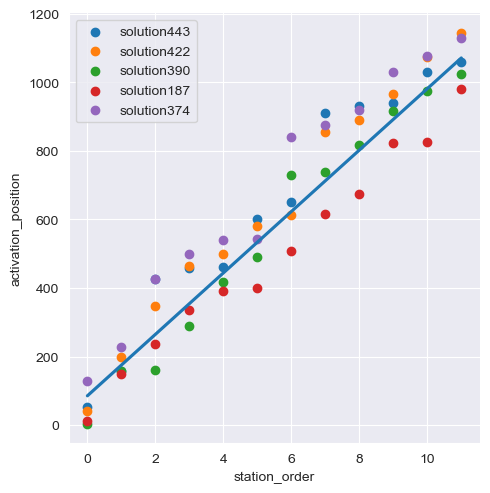

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns
import random
sns.lmplot(data=XY, x='station_order', y='activation_position', scatter=False)
s = XY.sample(200)

# for s in range(solutions):
# for s in XY.solution.unique().sample(5):
for s in random.choices(XY.solution.unique(), k=5):
    g = XY[XY.solution==s]
    plt.scatter(g.station_order, g.activation_position, label=f'solution{s}')
plt.legend()
plt.show()